In [ ]:
#importando pra ipynb pra permitir a visualizaçao
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("metricas.csv", sep=";")
df.head(10)

,Jogador,gols_totais,ass_totais,xG_totais,npxG_totais,xAG_totais,SCA_totais,GCA_totais,PrgP_totais,PrgC_totais,...,Suc/90,Bloq/90,Am/90,Vm/90,G+A,G+A/90,G-xG,xG+xAG,xG+xAG/90,Drible%
0,Yuri Alberto,15,4,10.7,8.3,1.6,63.0,10.0,31.0,52.0,...,0.860264,0.450614,0.245790,0.040965,19,0.778334,4.3,12.3,0.503869,0.403846
1,Alerrandro,15,4,11.0,7.8,2.6,68.0,7.0,55.0,16.0,...,0.377042,1.093423,0.150817,0.000000,19,0.716380,4.0,13.6,0.512778,0.416667
2,Estevão,13,9,10.3,7.9,6.9,139.0,19.0,92.0,145.0,...,3.605150,0.686695,0.171674,0.000000,22,0.944206,2.7,17.2,0.738197,0.461538
3,Pablo Vegetti,12,2,12.8,11.2,2.6,47.0,5.0,37.0,10.0,...,0.090422,0.632954,0.210985,0.000000,14,0.421969,-0.8,15.4,0.464166,0.176471
4,Raphael Veiga,11,3,10.7,7.5,7.1,155.0,9.0,168.0,57.0,...,0.726392,0.617433,0.108959,0.036320,14,0.508475,0.3,17.8,0.646489,0.476190
5,Pedro,11,5,10.6,6.6,2.2,48.0,11.0,36.0,16.0,...,0.816697,0.816697,0.163339,0.000000,16,0.871143,0.4,12.8,0.696915,0.416667
6,Luciano,11,2,7.0,5.3,2.2,60.0,10.0,91.0,24.0,...,0.586447,0.899218,0.508254,0.039096,13,0.508254,4.0,9.2,0.359687,0.416667
7,Lucas Moura,10,6,4.9,3.3,2.9,103.0,12.0,131.0,87.0,...,1.923419,0.681211,0.160285,0.000000,16,0.641140,5.1,7.8,0.312556,0.480000
8,Hulk,10,5,8.5,5.4,2.0,80.0,13.0,57.0,33.0,...,1.644518,0.398671,0.249169,0.049834,15,0.747508,1.5,10.5,0.523256,0.423077
9,Rodrigo Garro,10,10,6.1,5.3,7.2,191.0,15.0,248.0,62.0,...,0.811352,0.871452,0.240401,0.000000,20,0.601002,3.9,13.3,0.399666,0.391304


In [ ]:
#conv de chances criadas
df["G_xG_ratio"] = df["gols_totais"] / df["xG_totais"].replace(0, np.nan)

#eficiencia criativa
df["A_xAG_ratio"] = df["ass_totais"] / df["xAG_totais"].replace(0, np.nan)

#cartões totais
df["cartoes_totais"] = df["amarelos_totais"] + df["vermelhos_totais"]

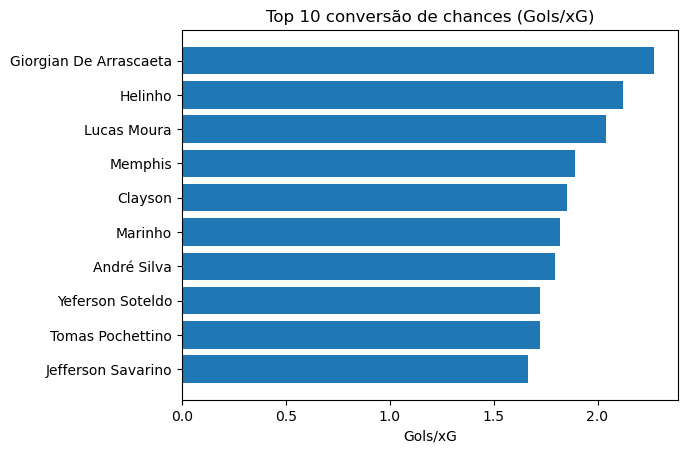

In [ ]:
#conv de chances
df_conv = df[df["xG_totais"] >= 2]

top = df_conv.sort_values("G_xG_ratio", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["G_xG_ratio"])
plt.title("Top 10 conversão de chances (Gols/xG)")
plt.xlabel("Gols/xG")
plt.gca().invert_yaxis()
plt.show()

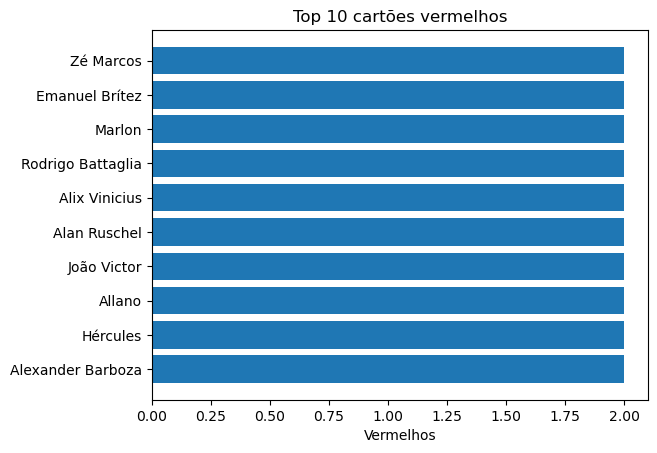

In [ ]:
#vermelhos
top = df.sort_values("vermelhos_totais", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["vermelhos_totais"])
plt.title("Top 10 cartões vermelhos")
plt.xlabel("Vermelhos")
plt.gca().invert_yaxis()
plt.show()

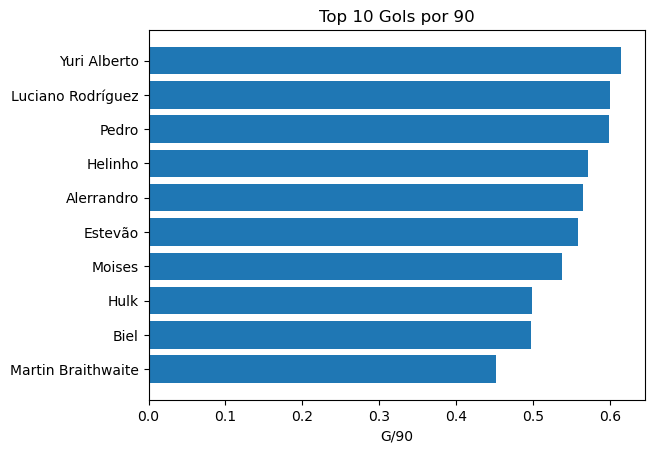

In [ ]:
#gols por 90
df_rank = df[df["minutos_totais"] >= 900]

top = df_rank.sort_values("G/90", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["G/90"])
plt.title("Top 10 Gols por 90")
plt.xlabel("G/90")
plt.gca().invert_yaxis()
plt.show()

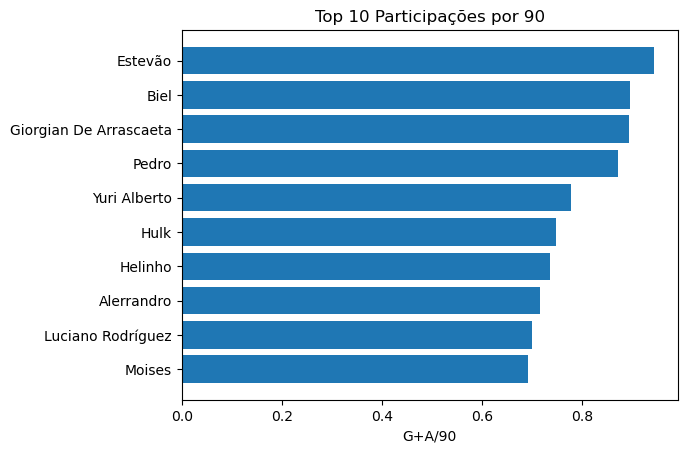

In [ ]:
#participações por 90
top = df_rank.sort_values("G+A/90", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["G+A/90"])
plt.title("Top 10 Participações por 90")
plt.xlabel("G+A/90")
plt.gca().invert_yaxis()
plt.show()

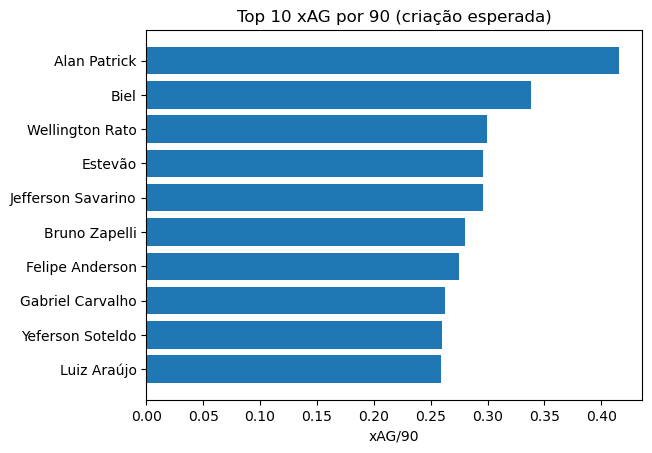

In [ ]:
#xAG por 90 
top = df_rank.sort_values("xAG/90", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["xAG/90"])
plt.title("Top 10 xAG por 90 (criação esperada)")
plt.xlabel("xAG/90")
plt.gca().invert_yaxis()
plt.show()

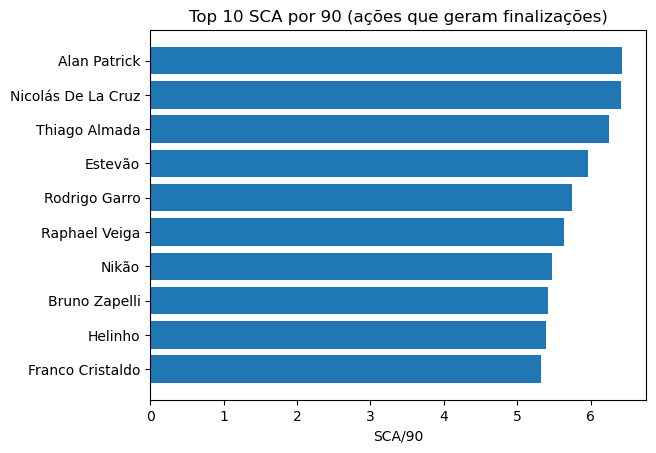

In [ ]:
#SCA por 90
top = df_rank.sort_values("SCA/90", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["SCA/90"])
plt.title("Top 10 SCA por 90 (ações que geram finalizações)")
plt.xlabel("SCA/90")
plt.gca().invert_yaxis()
plt.show()

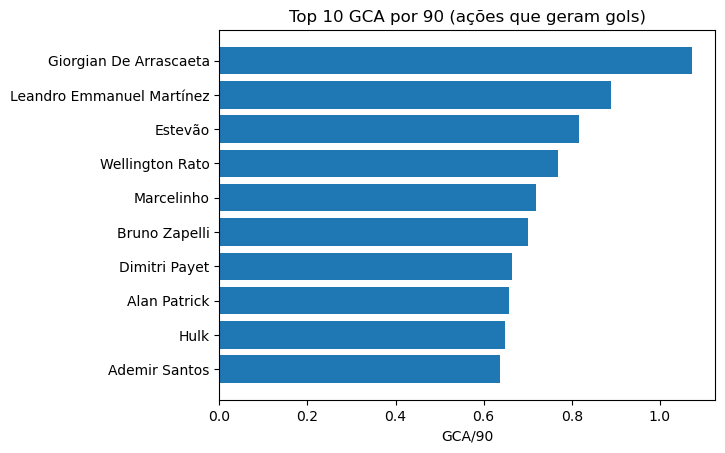

In [ ]:
#GCA por 90
top = df_rank.sort_values("GCA/90", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["GCA/90"])
plt.title("Top 10 GCA por 90 (ações que geram gols)")
plt.xlabel("GCA/90")
plt.gca().invert_yaxis()
plt.show()

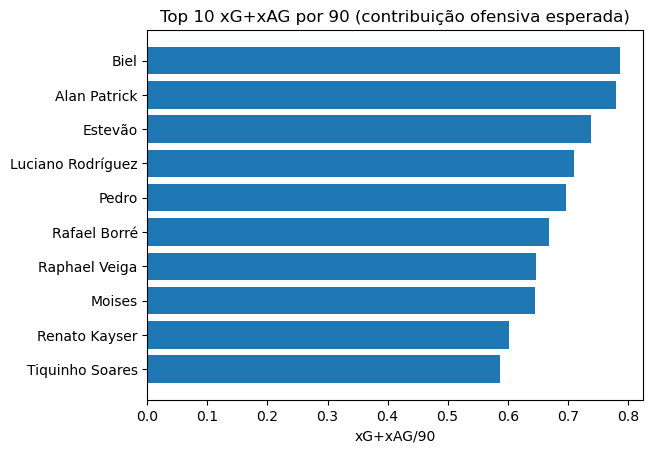

In [ ]:
#(xG+xAG/90)
top = df_rank.sort_values("xG+xAG/90", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["xG+xAG/90"])
plt.title("Top 10 xG+xAG por 90 (contribuição ofensiva esperada)")
plt.xlabel("xG+xAG/90")
plt.gca().invert_yaxis()
plt.show()

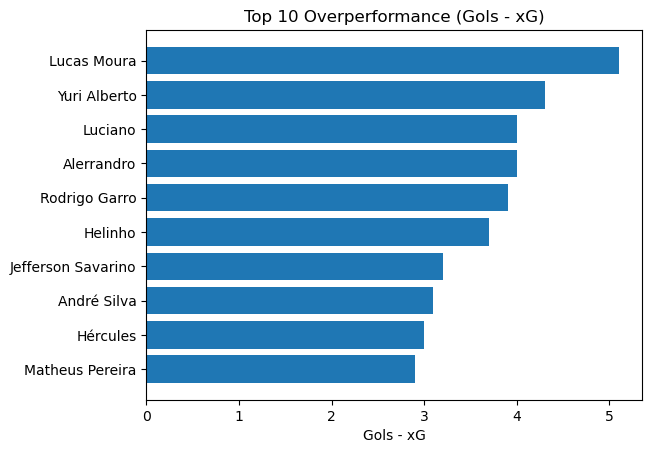

In [ ]:
#Gols - xG 
top = df_rank.sort_values("G-xG", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["G-xG"])
plt.title("Top 10 Overperformance (Gols - xG)")
plt.xlabel("Gols - xG")
plt.gca().invert_yaxis()
plt.show()

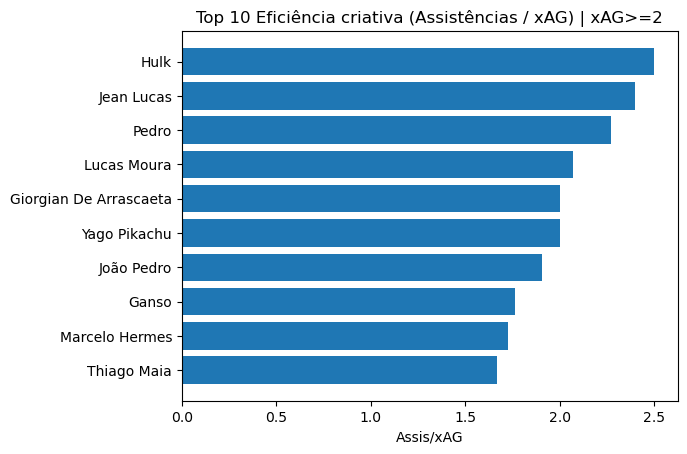

In [ ]:
#ef criativa 
df_cre = df_rank[df_rank["xAG_totais"] >= 2].copy()
top = df_cre.sort_values("A_xAG_ratio", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["A_xAG_ratio"])
plt.title("Top 10 Eficiência criativa (Assistências / xAG) | xAG>=2")
plt.xlabel("Assis/xAG")
plt.gca().invert_yaxis()
plt.show()

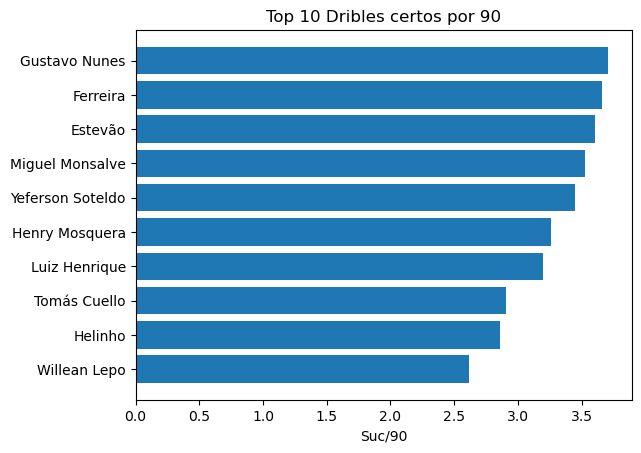

In [ ]:
#dribles por 90 
top = df_rank.sort_values("Suc/90", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["Suc/90"])
plt.title("Top 10 Dribles certos por 90")
plt.xlabel("Suc/90")
plt.gca().invert_yaxis()
plt.show()

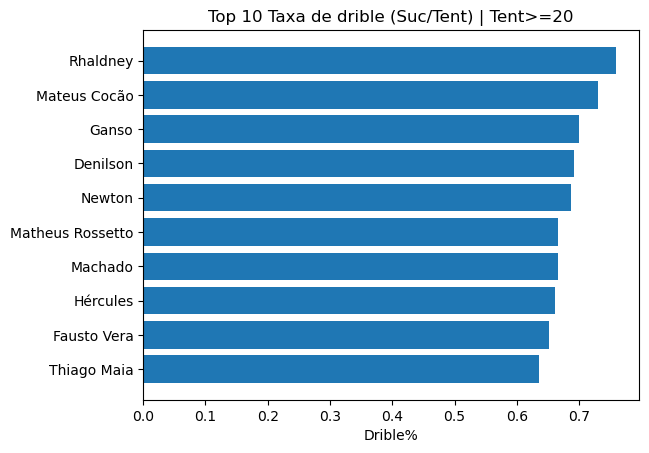

In [ ]:
#taxa de dribles filtrado por tentativas 
df_dr = df_rank[df_rank["tent_drible_totais"] >= 20].copy()
top = df_dr.sort_values("Drible%", ascending=False).head(10)

plt.figure()
plt.barh(top["Jogador"], top["Drible%"])
plt.title("Top 10 Taxa de drible (Suc/Tent) | Tent>=20")
plt.xlabel("Drible%")
plt.gca().invert_yaxis()
plt.show()

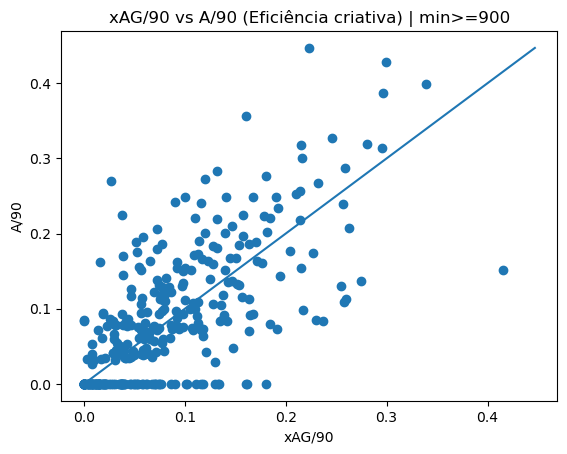

In [ ]:
#xAG/90 vs A/90  (linha y=x)
plt.figure()
plt.scatter(df_rank["xAG/90"], df_rank["A/90"])
maxv = max(df_rank["xAG/90"].max(), df_rank["A/90"].max())
plt.plot([0, maxv], [0, maxv])
plt.title("xAG/90 vs A/90 (Eficiência criativa) | min>=900")
plt.xlabel("xAG/90")
plt.ylabel("A/90")
plt.show() 

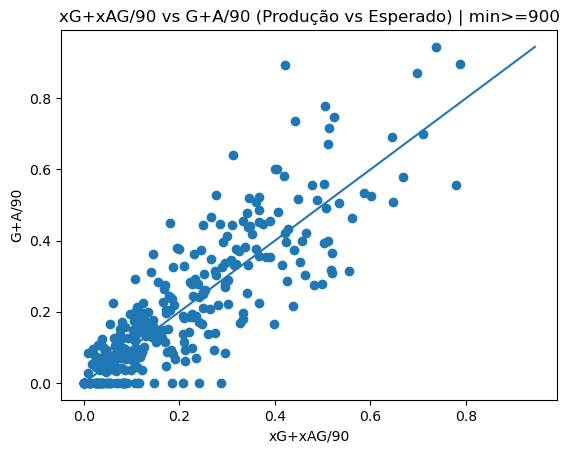

In [ ]:
#xG+xAG/90 vs G+A/90 (linha y=x)
plt.figure()
plt.scatter(df_rank["xG+xAG/90"], df_rank["G+A/90"])
maxv = max(df_rank["xG+xAG/90"].max(), df_rank["G+A/90"].max())
plt.plot([0, maxv], [0, maxv])
plt.title("xG+xAG/90 vs G+A/90 (Produção vs Esperado) | min>=900")
plt.xlabel("xG+xAG/90")
plt.ylabel("G+A/90")
plt.show()